In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'results/s_results.tsv'  # Update this path if needed
data = pd.read_csv(file_path, sep='\t')

# Specified ranks in the desired order
specified_ranks = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus']

# Filter data to include only the specified ranks
gold_standard = data[(data['tool'] == 'Gold standard') & (data['rank'].isin(specified_ranks))]
tools = data[(data['tool'] != 'Gold standard') & (data['rank'].isin(specified_ranks))]

# Function to plot comparison between gold standard and tools
def plot_comparison(metric, gold_standard, tools):
    # Filter the data for the specific metric
    gold_metric = gold_standard[gold_standard['metric'] == metric]
    tools_metric = tools[tools['metric'] == metric]

    # Pivot the data for easier plotting
    gold_pivot = gold_metric.pivot(index='rank', columns='metric', values='value')
    tools_pivot = tools_metric.pivot(index=['tool', 'rank'], columns='metric', values='value').reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    for tool in tools_pivot['tool'].unique():
        tool_data = tools_pivot[tools_pivot['tool'] == tool]
        plt.plot(tool_data['rank'], tool_data[metric], label=tool)
    
    plt.plot(gold_pivot.index, gold_pivot[metric], label='Gold standard', linewidth=2, color='black')
    
    plt.xlabel('Rank')
    plt.ylabel(metric)
    plt.title(f'Comparison of Tools vs Gold Standard for {metric}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'comparison_{metric}.png')
    plt.show()

# List of metrics to plot
metrics = gold_standard['metric'].unique()

# Generate plots for each metric
for metric in metrics:
    plot_comparison(metric, gold_standard, tools)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'results/s_results.tsv'  # Update this path if needed
data = pd.read_csv(file_path, sep='\t')

specified_ranks = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

gold_standard = data[(data['tool'] == 'Gold standard') & (data['rank'].isin(specified_ranks))]
tools = data[(data['tool'] != 'Gold standard') & (data['rank'].isin(specified_ranks))]

def bar_plot(metric, gold_standard, tools):
    metric_data = tools[tools['metric'] == metric]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='rank', y='value', hue='tool', data=metric_data, order=specified_ranks)
    plt.axhline(y=gold_standard[gold_standard['metric'] == metric]['value'].mean(), color='black', linestyle='--', label='Gold standard')
    plt.title(f'Bar Plot of {metric} Across Tools and Ranks')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'bar_plot_{metric}.png')
    plt.show()

metrics = tools['metric'].unique()
for metric in metrics:
    bar_plot(metric, gold_standard, tools)


/tmp/ipykernel_349692/375981001.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  metric_data = tools[tools['metric'] == metric].pivot('rank', 'tool', 'value')


KeyboardInterrupt: 

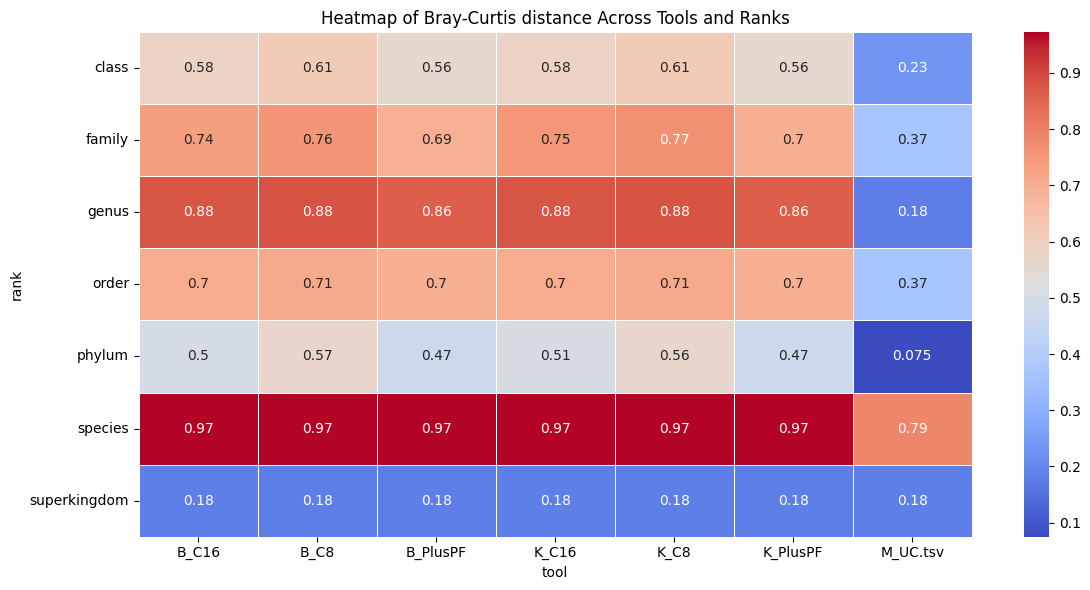

In [35]:
def heatmap(metric, tools):
    metric_data = tools[tools['metric'] == metric].pivot('rank', 'tool', 'value')
    plt.figure(figsize=(12, 6))
    sns.heatmap(metric_data, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Heatmap of {metric} Across Tools and Ranks')
    plt.tight_layout()
    #plt.savefig(f'heatmap_{metric}.png')
    plt.show()

for metric in metrics:
    heatmap(metric, tools)


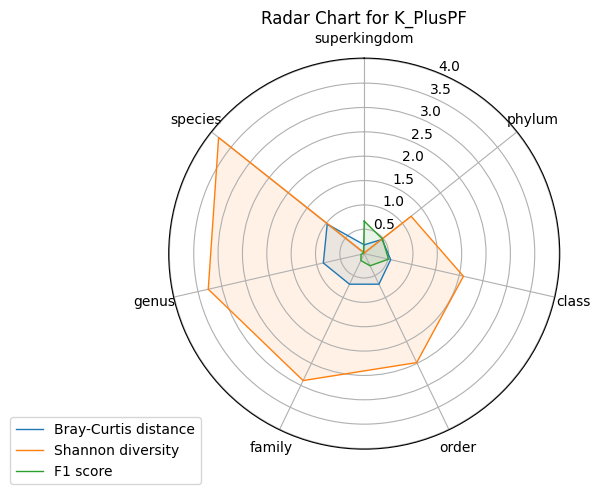

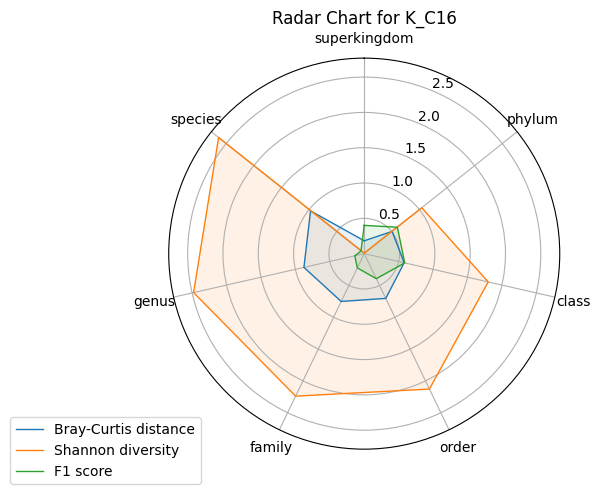

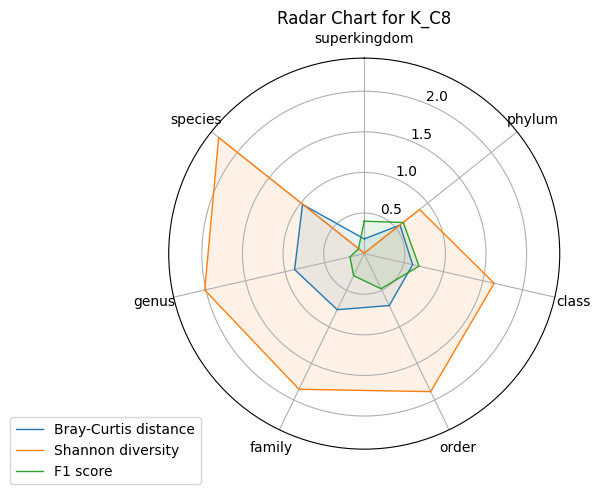

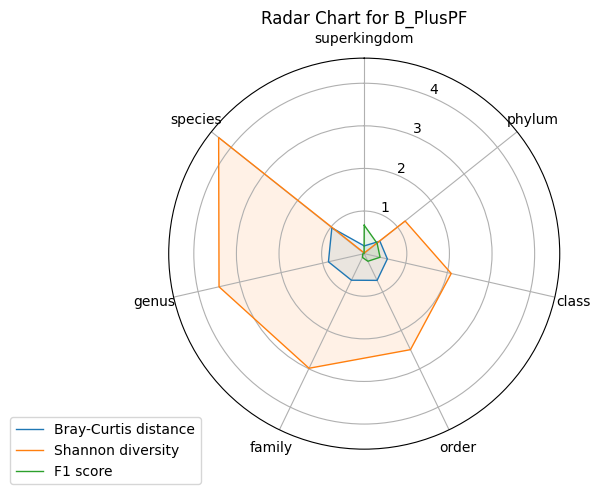

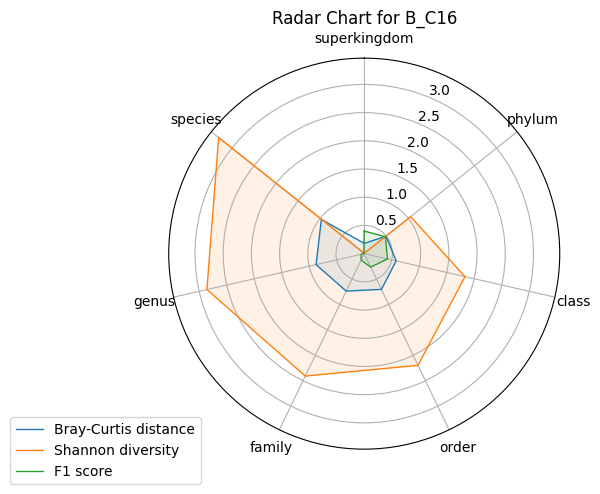

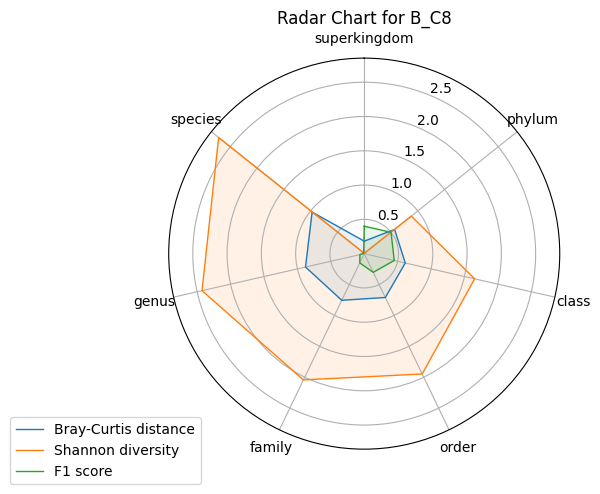

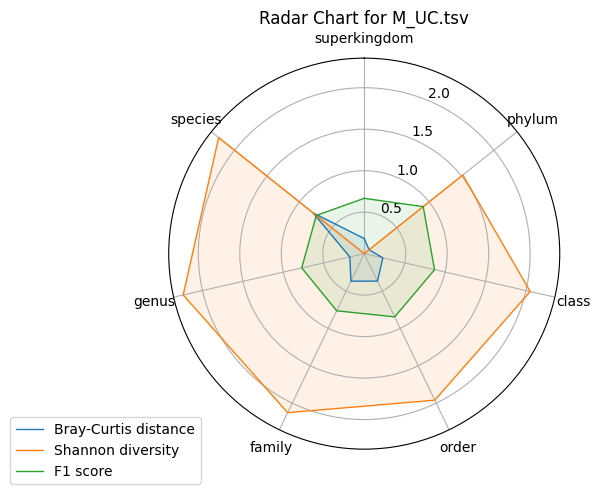

In [31]:
from math import pi

def radar_chart(ranks, metrics, gold_standard, tools):
    for tool in tools['tool'].unique():
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        values = []
        for metric in metrics:
            metric_data = tools[(tools['tool'] == tool) & (tools['metric'] == metric) & (tools['rank'].isin(ranks))]
            metric_values = [metric_data[metric_data['rank'] == rank]['value'].values[0] for rank in ranks]
            values.append(metric_values)
        angles = [n / float(len(ranks)) * 2 * pi for n in range(len(ranks))]
        angles += angles[:1]
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        plt.xticks(angles[:-1], ranks)
        for i, metric in enumerate(metrics):
            values[i] += values[i][:1]
            ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=metric)
            ax.fill(angles, values[i], alpha=0.1)
        plt.title(f'Radar Chart for {tool}')
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.tight_layout()
        plt.savefig(f'radar_chart_{tool}.png')
        plt.show()

# Example radar chart for a subset of metrics
metrics_subset = ['Bray-Curtis distance', 'Shannon diversity', 'F1 score']
radar_chart(specified_ranks, metrics_subset, gold_standard, tools)
